In [4]:
import os
import pandas as pd
import numpy as np
import re

In [5]:
df_origin = pd.read_csv('../Data/샴푸&두피제품 찾기/commentContent.csv')

In [6]:
# 총평리뷰: propTopic별 비율
df = df_origin.copy()
result = df.groupby(['tag', 'propTopic'])['href'].count().reset_index()
result['href'] = result['href'].apply(lambda x : round(x / result['href'].sum() * 100, 2))
result

,tag,propTopic,href
0,탈모샴푸,0,3.10
1,탈모샴푸,1,17.48
2,탈모샴푸,2,25.33
3,탈모샴푸,3,15.27
4,탈모샴푸,4,13.05
5,탈모샴푸,5,9.73
6,탈모샴푸,6,8.63
7,탈모샴푸,7,7.41


In [9]:
df_origin.head(2)

,href,title,reviewNum,tag,brand,company,howToUse,ingredients,image,volume,...,commentContent,commentGood,commentBad,category,preprocessedSentence,keyword,sentimentResult,propTopic,propTopicRatio,topicsRatio
0,https://daedamo.com/ingre/27320?sca=탈모관련상품&ove...,\n 블랙포레 두피 쿨&딥클린 탄산쿨링,962,탈모샴푸,블랙포레,애경산업,미온수로 모발 및 두피를 충분히 적시고 제품의 적당량을 취하여 두피 및 모발에 가볍...,"정제수,소듐C14-16올레핀설포네이트,소듐메틸코코일타우레이트,코카미도프로필베타인,글...",https://daedamo.com/new/data/file/ingre/210576...,500ml,...,탈모라 써봤는데 시원하고 좋아요,NaN,NaN,commentContent,탈모라 써봤는데 시원하고 좋아요.,"['모라', '쓰다', '좋']",NaN,2,0.7811,"[(0, 0.031257626), (1, 0.0312744), (2, 0.78111..."
1,https://daedamo.com/ingre/27320?sca=탈모관련상품&ove...,\n 블랙포레 두피 쿨&딥클린 탄산쿨링,962,탈모샴푸,블랙포레,애경산업,미온수로 모발 및 두피를 충분히 적시고 제품의 적당량을 취하여 두피 및 모발에 가볍...,"정제수,소듐C14-16올레핀설포네이트,소듐메틸코코일타우레이트,코카미도프로필베타인,글...",https://daedamo.com/new/data/file/ingre/210576...,500ml,...,머리감을때마다 시원하고좋아요,NaN,NaN,commentContent,머리 감을 때마다 시원하고 좋아요.,"['머리', '감다', '때', '좋']",NaN,4,0.8248,"[(0, 0.025016544), (1, 0.02503832), (2, 0.0250..."


In [53]:
df[(df['propTopic'] == 6) & (df['keyword'].apply(lambda x : '예쁘' in x ))]['commentContent'].iloc[0]

IndexError: single positional indexer is out-of-bounds

In [38]:
import os
import pandas as pd
import numpy as np

import sys
sys.path.append('..')

from Code.preprocessingSentence import *
from Code.ldaAnalysis import *

import matplotlib.pyplot as plt

In [29]:
ldaConfigJupyter = {'inputPath': '../Data/샴푸&두피제품 찾기/commentContent.csv', 
                    'fileFormat': 'csv',
                    'kmeansPath': '../Result/Graph/샴푸&두피케어_샴푸&두피제품 찾기/painPoint/commentContent/',
                    'knn': [5, 4, 7, 6, 8, 5, 6, 7]}

In [30]:
df_origin = pd.read_csv(ldaConfigJupyter['inputPath'])

(array([  3.,  10.,  12.,  26.,  34.,  30.,  55.,  31.,  20.,  17.,  17.,
         92.,  12.,  93.,  86.,  56.,  88., 104.,  79.,  39.]),
 array([0.3505  , 0.382635, 0.41477 , 0.446905, 0.47904 , 0.511175,
        0.54331 , 0.575445, 0.60758 , 0.639715, 0.67185 , 0.703985,
        0.73612 , 0.768255, 0.80039 , 0.832525, 0.86466 , 0.896795,
        0.92893 , 0.961065, 0.9932  ]),
 <BarContainer object of 20 artists>)

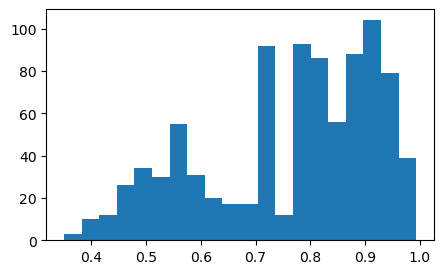

In [31]:
fig, ax = plt.subplots(figsize = (5, 3))

ax.hist(df_origin['propTopicRatio'], bins= 20)

c:\Users\WESLEYQUEST\anaconda3\envs\BigDataUtilization2023\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\WESLEYQUEST\anaconda3\envs\BigDataUtilization2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\WESLEYQUEST\anaconda3\envs\BigDataUtilization2023\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\WESLEYQUEST\anaconda3\envs\BigDataUtilization2023\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known

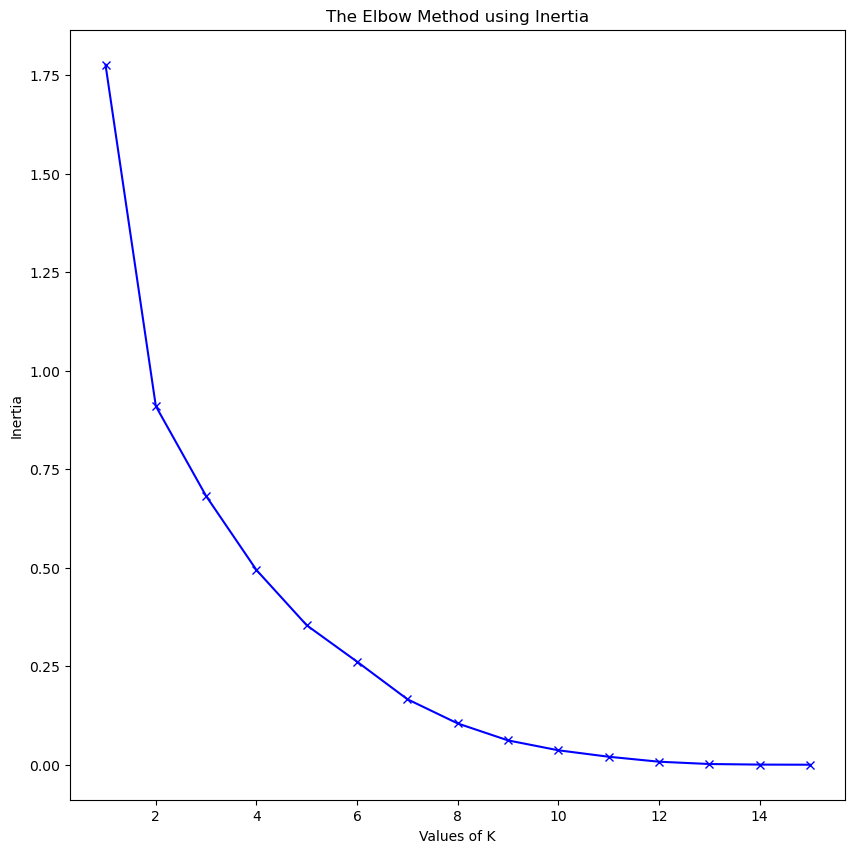

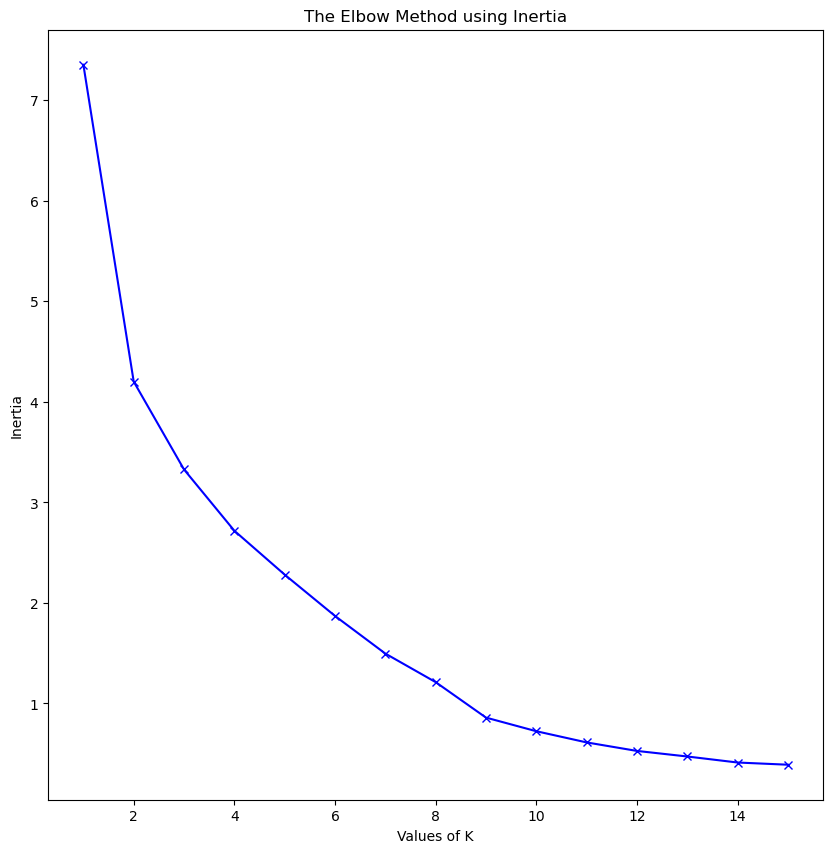

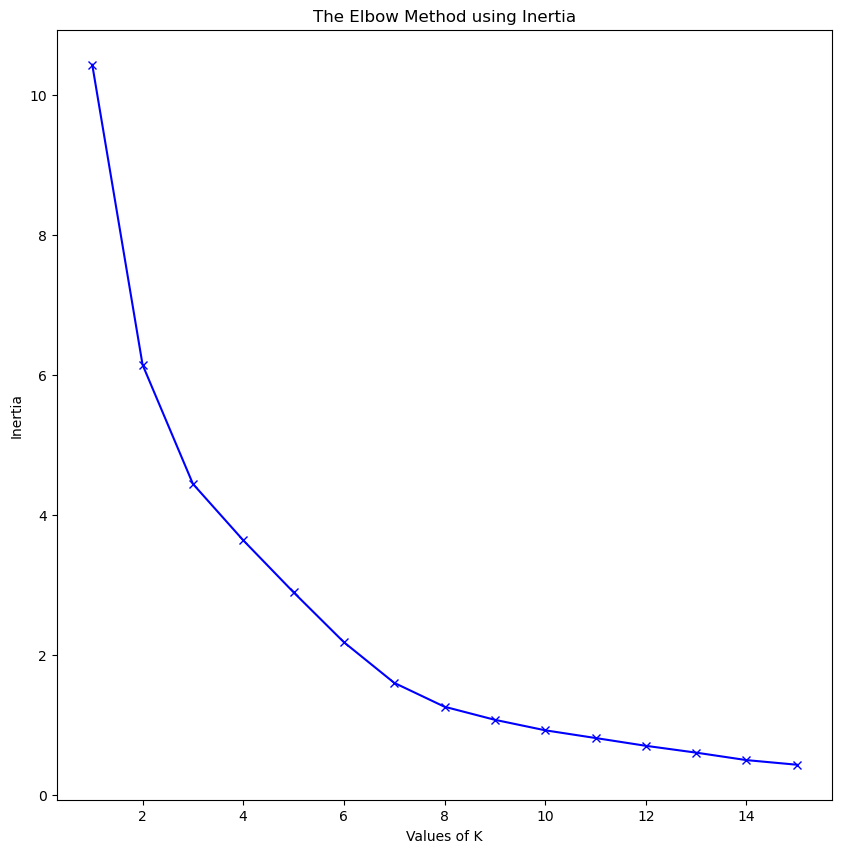

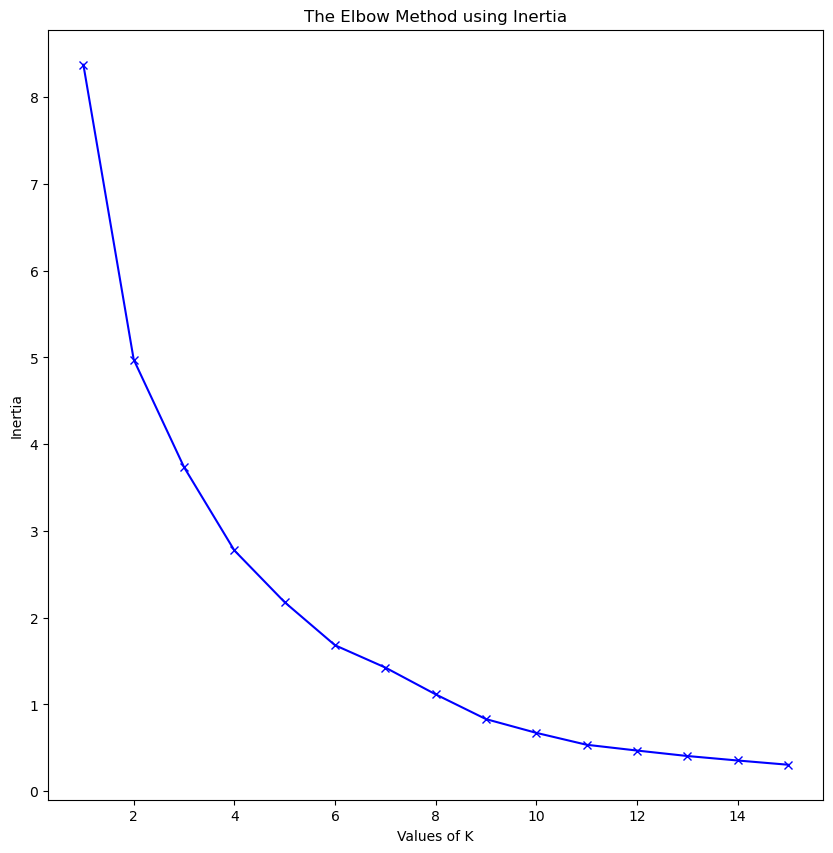

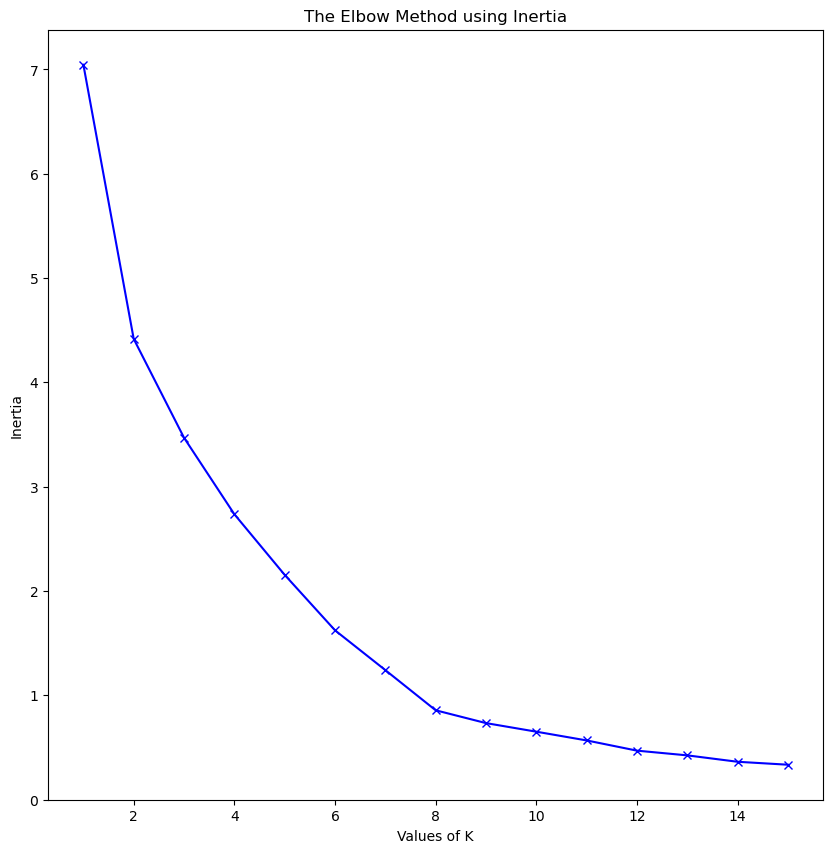

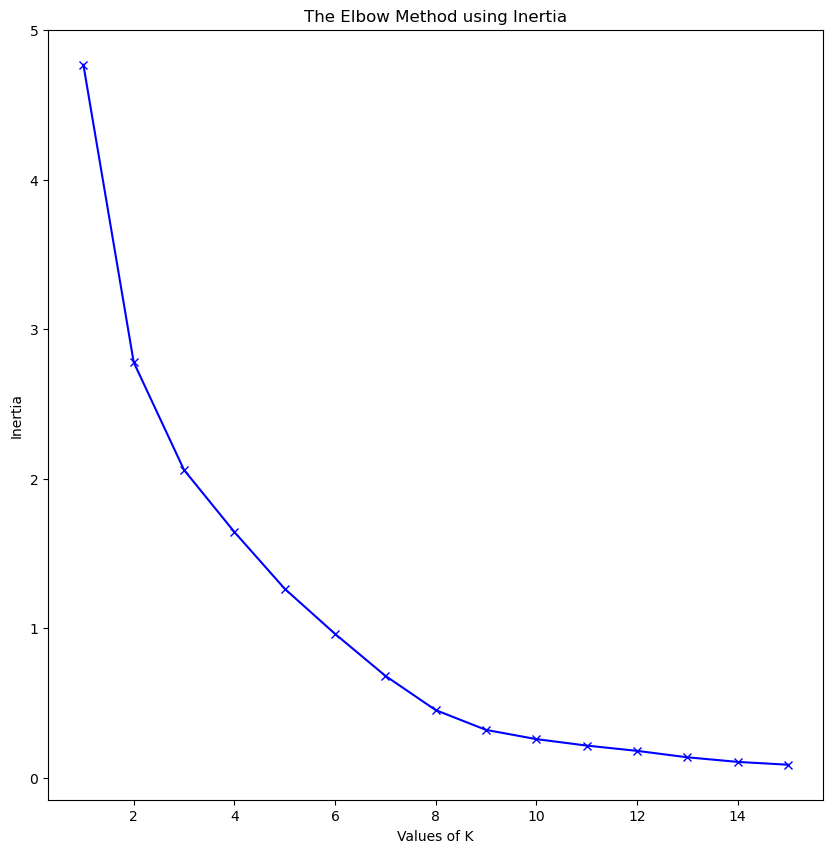

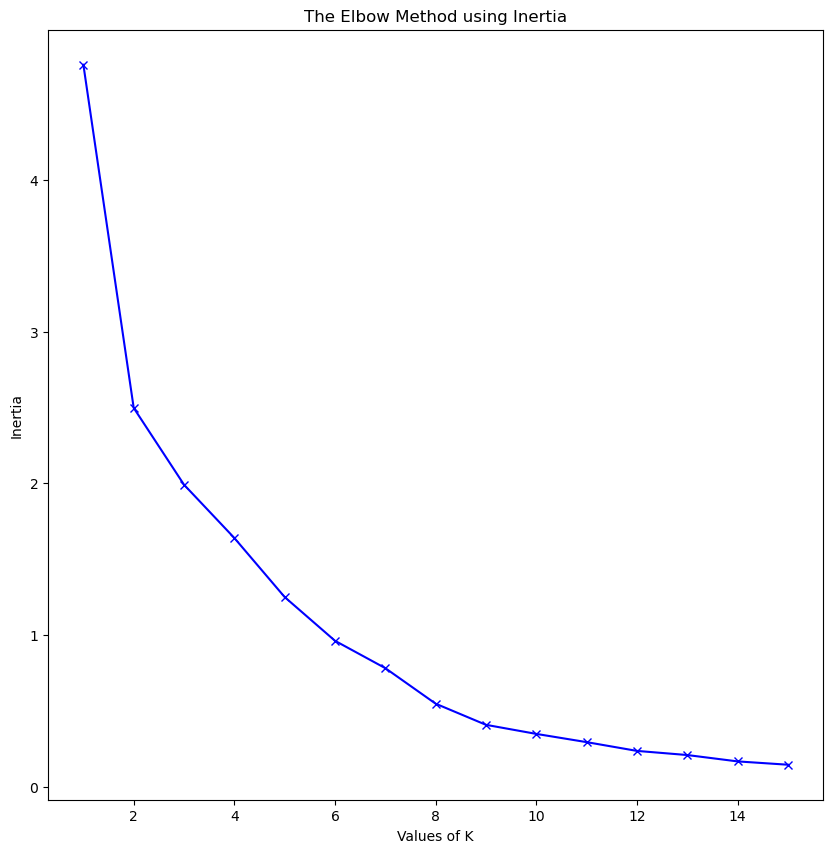

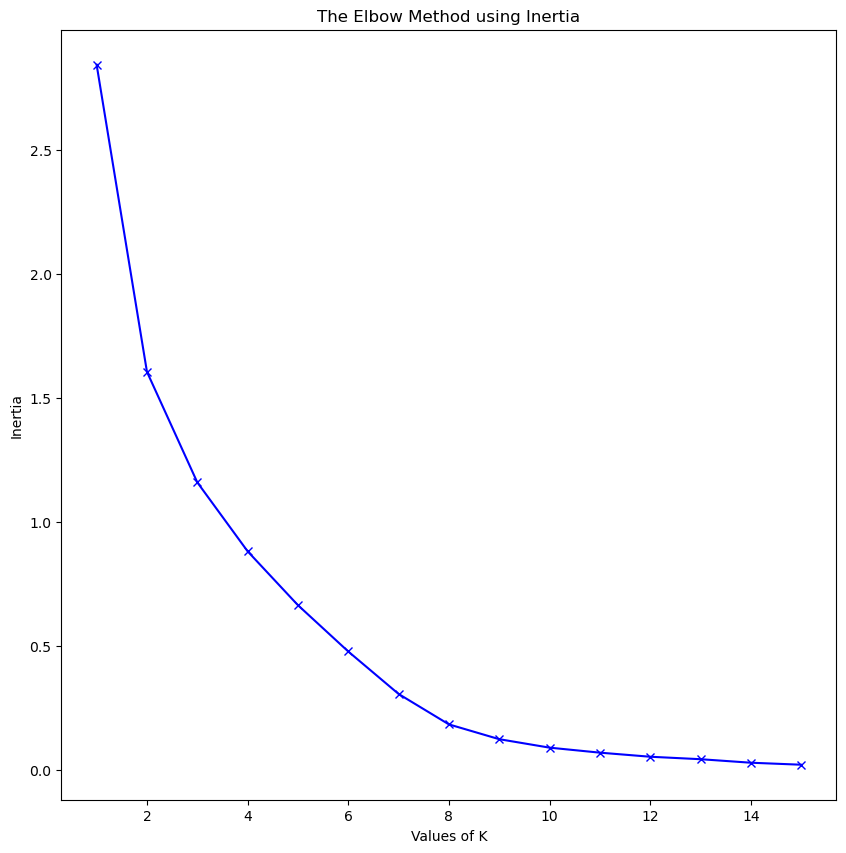

In [11]:
painPointCluster(ldaConfigJupyter)